# 데이터 로딩
- 사용자-영화 평점 행렬 데이터 사용
- Grouplens 사이트에서 만든 MovieLens 데이터 셋 사용(축소 버전 파일 사용)
- https://grouplens.org/datasets/movielens/latest

In [14]:
import pandas as pd
import numpy as np
movies = pd.read_csv("./데이터셋/movies.csv")
ratings = pd.read_csv("./데이터셋/ratings.csv")
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [15]:
display(movies.head())
display(ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
print(ratings['userId'].unique().size)

610


# 데이터 전처리
- 평점 데이터가 행 단위(테이블 형식) 데이터로 되어 있어서 사용자-아이템(영화) 평점 행렬로 변환 필요

In [17]:
ratings = ratings.drop('timestamp', axis=1)
ratings_matrix = pd.pivot_table(ratings, index='userId',columns='movieId', values = 'rating')

In [18]:
print(ratings_matrix.shape)
display(ratings_matrix.tail(3))
print(ratings['rating'].min(), ratings['rating'].max())

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.5 5.0


- 영화 아이디를 제목으로 변환하기 위해 ratings 데이터와 movies 데이터 병합
- 관람하지 않은 영화의 평점은 0으로 변경

In [19]:
ratings_movies = pd.merge(ratings, movies)
ratings_matrix = pd.pivot_table(ratings_movies,index='userId',columns='title',values='rating')
ratings_matrix=ratings_matrix.fillna(0)
display(ratings_matrix.head(3))

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 영화와 영화들 간 유사도 산출
- cosine_similarity()를 이용하여 영화와 영화들 간의 유사도를 산출하기 위해 ratings_matrix 영화를 행기준으로 만들기 위해 전치를 시켜야 함

In [20]:
ratings_matrix_T = ratings_matrix.T
display(ratings_matrix_T.head(3))

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
item_sims = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
item_sims_df = pd.DataFrame(item_sims, index=ratings_matrix.columns, columns=ratings_matrix.columns)
print(item_sims_df.shape)
display(item_sims_df.head(3)) #영화간 평점 유사도 =  영화 유사도 = 유사한 취향

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [22]:
item_sims_df ['Godfather, The (1972)'].sort_values(ascending=False)[:5]
# 영화 'Godfather'와 평점 유사도가 높은 상위 5개 영화 확인

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Name: Godfather, The (1972), dtype: float64

# 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천
- 앞서 만든 아이템 기반 영화 유사도 데이터는 모든 사용자의 평점을 기준으로 영화의 유사도를 생성
- 최근접 이웃 협업 필터링을 통한 개인화된 영화 추천은 개인이 아직 관람하지 않은 영화를 추천하는 방식
- 아직 관람하지 않은 영화에 대해 아이템 유사도와 기존에 관람한 영화의 평점 데이터를 기반으로 새롭게 모든 영화의 예측 평점을 계산한 후 높은 예측 평점을 가진 영화를 추천해야함

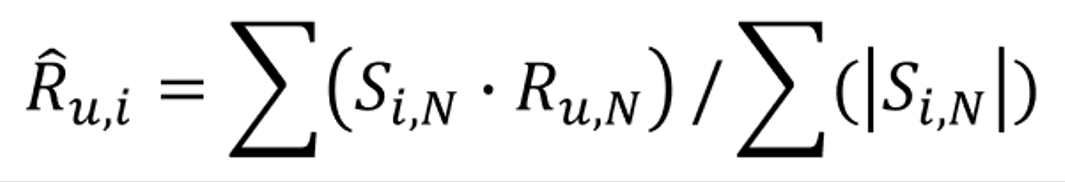
- R_hat(u,i) : 사용자 u, 아이템 i의 개인화된 예측 평점 값
- S(i,N): 아이템 i와 가장 유사도가 높은 top-n개 아이템의 유사도 벡터
- R(u,N): 사용자 u의 아이템 i와 가장 유사도가 높은 topn개 아이템에 대한 실제 평점 벡터. 내가 본 영화 중 아직 관람하지 않은 영화와 유사도가 높은 영화의 실제 평점
- 정규화를 위해 S(i,N)의 절대값으로 나눈다.

In [46]:
# ratings_arr 사용자-영화 평점 행렬 shape(610,9719)
# item_sim_arr 영화 간 평점 유사도 행렬 shape(9719,9719)
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    pred = np.zeros_like(ratings_arr) # R_hat

    for col in range(ratings_arr.shape[1]): # 영화의 수 만큼 반복 수행
        # 유사도 행렬에서 col번째 영화와 평점 유사도가 높은 n개 영화의 index값 반환
        top_n_items = np.argsort(item_sim_arr[:,col])[::-1][:n]
        for row in range(ratings_arr.shape[0]): # 사용자 수 만큼 반복
            pred[row,col] = item_sim_arr[col,:][top_n_items].dot(ratings_arr[row,:][top_n_items])
            pred[row,col] /= np.sum(np.abs(item_sim_arr[col,:][top_n_items]))
    return pred     

In [47]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sims_df.values, n=20)

In [48]:
ratings_pred_matrix = pd.DataFrame(ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)
print(ratings_pred_matrix.shape)

(610, 9719)


# 첫번째 유저의 9719개의 영화에 대한 예측 평점 최소, 최대 값 확인

In [49]:
print(np.max(ratings_pred_matrix, axis=1)[:1])
print(np.min(ratings_pred_matrix, axis=1)[:1])

userId
1    4.595776
dtype: float64
userId
1    0.0
dtype: float64


# 첫번째 유저의 9719개의 영화에 대한 예측 평점 중 0이 아닌 영화의 수

In [50]:
user_0 = ratings_pred_matrix.values[0]
print(len(user_0[user_0 != 0]))

1133


# userId=9가 평점을 준 영화 중 평점이 높은 순서 10개 추출

In [42]:
user_rating_id=ratings_matrix.loc[9,:]
user_rating_id[user_rating_id != 0].sort_values(ascending=False)[:10]
print(user_rating_id)

title
'71 (2014)                                   0.0
'Hellboy': The Seeds of Creation (2004)      0.0
'Round Midnight (1986)                       0.0
'Salem's Lot (2004)                          0.0
'Til There Was You (1997)                    0.0
                                            ... 
eXistenZ (1999)                              0.0
xXx (2002)                                   1.0
xXx: State of the Union (2005)               0.0
¡Three Amigos! (1986)                        0.0
À nous la liberté (Freedom for Us) (1931)    0.0
Name: 9, Length: 9719, dtype: float64


# 평점을 주지 않은 영화(관람하지 않은 영화) 리스트 반환 함수 정의

In [58]:
def get_unseen_movies(ratings_matrix, userId) : 
    user_rating = ratings_matrix.loc[userId,:] # 시리즈 객체 반환
    unseen_list = user_rating[user_rating==0].index.values # 관람하지 않은 영화 제목만 ndarray로 반환
    return unseen_list

# 특정 사용자의 관람하지 않은 영화에 대한 예측 평점 기반 추천

In [59]:
unseen_list = get_unseen_movies(ratings_matrix,userId=9)
ratings_pred_matrix.loc[9,unseen_list]

title
'71 (2014)                                                0.0
'Hellboy': The Seeds of Creation (2004)                   0.0
'Round Midnight (1986)                                    0.0
'Salem's Lot (2004)                                       0.0
'Til There Was You (1997)                                 0.0
                                                         ... 
anohana: The Flower We Saw That Day - The Movie (2013)    0.0
eXistenZ (1999)                                           0.0
xXx: State of the Union (2005)                            0.0
¡Three Amigos! (1986)                                     0.0
À nous la liberté (Freedom for Us) (1931)                 0.0
Name: 9, Length: 9673, dtype: float64

In [63]:
# 예측 평점 DataFrame에서 사용자 id와 uunseen_list로 들어온 영화명 컬럼을 추출하여 가장 예측 평점이 높은 순으로 정렬하여 상위 n개 추출
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    return pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]

In [64]:
unseen_list = get_unseen_movies(ratings_matrix, userId=9)
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9,unseen_list,top_n=10)
recomm_movies = pd.DataFrame(recomm_movies.values, index=recomm_movies.index,columns=['pred score'])
display(recomm_movies)

,pred score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591
